# 5.2 - Fully non-linear problems: Seismic Receiver function search#

*Andrew Valentine & Malcolm Sambridge - Research School of Earth Sciences, The Australian National University - Last updated Sept. 2019*

'Receiver functions' are a class of seismic data used to study discontinuities (layering) in the Earth's crust. At each discontinuity, P-to-S conversions occur, introducing complexity in the waveform. By deconvolving horizontal- and vertical-channel waveforms from earthquakes at teleseismic distances, we can isolate information about these conversions, and hence learn about the crustal structure. This deconvolved signal is the receiver function, and has a highly non-linear dependence on the local crustal properties.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from inversionCourse import rf

The function `rf.rfcalc()` computes synthetic receiver functions (using routines developed by Takuo Shibutani). It is called as follows:
```python
t,rfunc = rf.rfcalc(model)
```
where `model` is a NumPy array of dimension `[nlayers,3]`. The values in `model[:,0]` give the depths of discontinuities in the model, while `model[:,1]` contains the S-wave speed above the interface. `model[:,2]` is the ratio of S-wave speed to P-wave speed. The maximum depth of discontinuity that can be considered is 60km.

For example, here is the Earth model.

In [3]:
model = np.array([[1,4.0,1.7],
                  [3.5,4.3,1.7],
                  [8.0,4.2,2.0],
                  [20, 6,1.7],
                  [45,6.2,1.7]])

Lets plot the Earth model

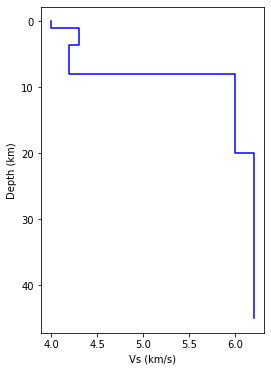

In [4]:
px = np.zeros([2*len(model),2])
py = np.zeros([2*len(model),2])
n=len(model)
px[0::2,0],px[1::2,0],px[1::2,1],px[2::2,1] = model[:,1],model[:,1],model[:,0],model[:-1,0]
plt.figure(figsize=(4,6))
plt.xlabel('Vs (km/s)')
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis()
plt.plot(px[:,0],px[:,1],'b-')
plt.show()

Now we calculate the receiver function and plot it.

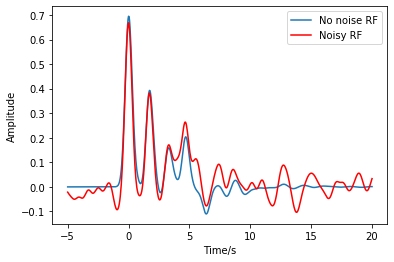

In [5]:
# calculate and plot receiver function
t,rfunc = rf.rfcalc(model)          # Receiver function
t2,rfunc2 = rf.rfcalc(model,sn=0.5,seed=12345678) # Receiver function with added correlated noise
plt.plot(t,rfunc,label='No noise RF')
plt.plot(t2,rfunc2,'r-',label='Noisy RF')
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

**Task 1:** Familiarise yourself with the function `rf.rfcalc()` and explore how the receiver function behaves as you change the model.

In [5]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 2:** Invent a model with around 5 layers, plot it and then compute the corresponding receiver function with the noise parameter $sn$ set to some reasonable value, say $sn=0.5$. Plot the noisy and noiseless receiver functions together just as in the figure above. We are going to treat the noisy receiver function as data.

To measure the fit of this observed receiver function to the receiver function predicted by any other model, ${\mathbf d}_{pred}$, we need to compute the negative log of the Likelihood

\begin{equation*}
-\log (p({\mathbf d}_{obs} | {\mathbf m}) = ({\mathbf d}_{obs}-{\mathbf d}_{pred})^T C_D^{-1} ({\mathbf d}_{obs}-{\mathbf d}_{pred})
\end{equation*}

where $C_D^{-1}$ is the inverse data covariance matrix describing correlated noise in the receiver function. You can do this using the supplied routine InvDataCov($\sigma_t$,$\sigma_a$,$n$), which builds an $nxn$ inverse data covariance matrix for a time signal with amplitude variance $\sigma_a^2$ and time correlation length $\sigma_t$, for receiver length of $n$ time samples. In this example you can use $\sigma_t = 2.5$, $\sigma_a=0.01$. Compute the negative log Likelihood betwen the noisy data and the predicted receiver function of the true model. 

In [ ]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



In [ ]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

Cdinv = rf.InvDataCov(2.5,0.01,len(rfunc)) # This is the inverse data covaraince for the noisy receiver function

# now compute the negative log Likelihood between the receiver functions of your two models.


**Task 3:** Now we're going to assume that we know everything about the model, except for the depth of one interface. Select one interface in your model which you will pretend is 'unknown', and plot how the agreement between 'data' and synthetics varies with this unknown. Choose ranges for each variable something like the following $(0,60 km)$ for a depth variable. Try and plot the negative log-Likelihood as a function of the depth variable. Is the minimum where you expected it to be? Does your plot give you the impression that this problem is highly nonlinear?

In [ ]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# Calculate misfit as a function of depth of a chosen layer


**Task 4:** Explore what happens if the unknown parameter is $V_s$ in the layer, or its $V_p/V_s$ ratio, and its depth is known. Choose ranges for each variable something like $\pm 1.0 km/s$ for a $V_s$ variable or $\pm 0.5$ for $/V_s/V_p$. 

In [ ]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# Calculate misfit as a function of shear velocity of a chosen layer


In [ ]:

#Calculate misfit as a function of Vs/Vp ratio of a chosen layer



**Task 5:** Now, suppose we have two unknown parameters - the interface depth and associated $V_s$, perhaps, or two depth parameters. Map out how the agreement between 'data' and predicted receiver function varies as you change both parameters. Plot a contour map of this data misfit surface? How multi-modal is this?

In [ ]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 6:** Now choose to search this 2-D space with either a (nested) grid search in a square or a (nested) Gaussian sampler. In each case you must choose the density of the sampling, adjust the centre of the sampling in each iteration and record the progress toward finding the best fit solution. How close do you get to the known true values? How does the distance between the best fit solution and the true solution change with numbers of random samples? Try and plot this.

In [ ]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 7:** What happens when you repeat this process and start from a different point. Try several and see if you always get a solution? Are there starting points where it does not converge?

In [ ]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 8:** What do you think would happen if you repeat this process and increase the number of unknown parameters in your inversion? If you wish a challenge you could try it in 3 or 4 parameters, or even all of them but I suspect you will be waiting a long time for a solution!

In [ ]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

